# Student-Score Prediction


Our Aim is to predict the percentage of an student based on the no. of study hours.

In [2]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
score=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [30]:
score.shape

(25, 2)

Checking for the Null Values if Any

In [34]:
score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
score.head(10) #To see the first 10 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we will check the linearity between the 2 variables using Scatter plot

# Visualizing the Data

Text(0.5, 1.0, 'Linearity Check')

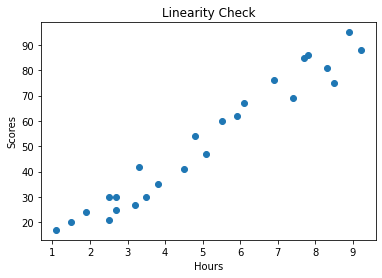

In [13]:
plt.scatter(score['Hours'],score['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linearity Check')

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

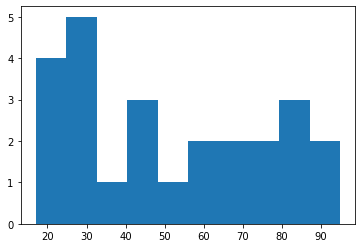

In [11]:
plt.hist(score['Scores'])

In [15]:
#To check the dependency of one variable on other/Checking the collinearity of  variables
score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [21]:
#Seperating values of X and y
X=score.iloc[:,0:1].values
Y=score.iloc[:,1].values

## Splitting the test and the training Data

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

##  Building Linear-Model for Prediction 

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [24]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Now we will check for the accuracy of our Model using r2 score

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy Score:",r2_score(y_test,y_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Accuracy Score: 94.54906892105353
Mean Squared Error: 21.598769307217456


Giving our data to the system for prediction

In [36]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Hours:",hours)
print("Score:",own_pred[0])

Hours: 9.25
Score: 93.69173248737539


## Seeing how our predicted values and actual values differ

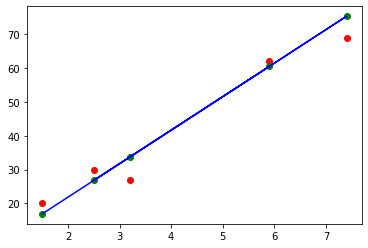

In [40]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.scatter(X_test,y_pred,color='green')